# 1. Softmax logistic regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [60]:
data = pd.read_csv("../data/MNIST_train.csv").values

X_data = data[:, 1:]
Y_data = data[:, [0]]

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state = 0)

print("Number of training examples = " + str(X_train.shape[0]) )
print("Number of testing examples = " + str(X_test.shape[0]) )
print("Number of features = " +  str(X_train.shape[1]) )

Number of training examples = 31500
Number of testing examples = 10500
Number of features = 784


Text(0.5,1,'label is [5]')

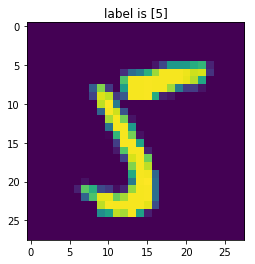

In [61]:
index = 10
sampleImg = np.reshape(X_train[index, :], [28, 28])

ax = plt.imshow(sampleImg)
plt.title("label is " + str(Y_train[index, :]))

Simple standardization for images

In [62]:
X_train = X_train / 255
X_test = X_test / 255

Convert labels to its one-hot encoding for defining the lost function of softmax classification

In [70]:
def one_hot_matrix(Y, num_class):
    """
    Convert an array of Y to its one_hot_matrix
    
    Arguments:
    Y -- array (number of examples, 1)
    num_class -- num of classes
    
    Return:
    Y_one_hot -- (number of examples, num_class)
    """
    Y_one_hot = np.zeros((Y.shape[0], num_class))
    Y_one_hot[np.arange(Y.shape[0]), Y.T] = 1
    
    return Y_one_hot

In [71]:
Y_train_one_hot = one_hot_matrix(Y_train, 10)
Y_test_one_hot = one_hot_matrix(Y_test, 10)

index = 2
print("Letter " + str(Y_train[index, 0]) + " converted to " + str(Y_train_one_hot[index, :]))

Letter 9 converted to [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 1. Forward propagation
We treate the softmax classification problem as a 1-layer neural network with 10 nerons (add image). Each neural is just a linear combination of all input features, and the softmax activation function takes effect for all neurons.  

In [72]:
def linear_forward(X, W, b):
    """
    Arguments:
    X -- data matrix (num of examples, num of features)
    W -- weight matrix (num of features, num of classes)
    b -- bias vector (1, num of classes)
    
    Return: 
    Z -- input of activation function (num of examples, num of classes)
    """
    
    Z = np.dot(X, W) + b
    
    assert(Z.shape == (X.shape[0], W.shape[1]) )
    
    return Z

In [83]:
def soft_max(Z):
    """
    Arguments:
    Z -- (num of examples, num of classes)
    
    Return:
    A -- softmax matrix (num of examples, num of classes) 
    """
    exp_Z = np.exp(Z)
    A = exp_Z / exp_Z.sum(axis = 1, keepdims = True)
    
    assert(A.shape == Z.shape )
    
    return A

In [84]:
def initialize_parameters(num_features, num_class):
    """
    Return:
    W -- (num of features, num of classes)
    b -- (1, num of classes)
    """
    np.random.seed(1)
    W = np.random.randn(num_features, num_class)
    b = np.zeros((1, num_class))
    
    return W, b

In [89]:
num_features = X_train.shape[1]
num_class = 10

W, b = initialize_parameters(num_features, num_class)
Z = linear_forward(X_train, W, b)
A = soft_max(Z)

assert(A.shape == (X_train.shape[0], num_class))
print(A[3, :].sum())

1.0


## 2. Compute the cost function